# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')

Downloaded utils.py


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import math
import random as rand

from utils import decorate, savefig

# Set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

In [3]:
# make a directory for figures
!mkdir -p figs

In [4]:
# node colors for drawing networks
colors = sns.color_palette('pastel', 5)
#sns.palplot(colors)
sns.set_palette(colors)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [5]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Cate')
list(G.nodes())

['Alice', 'Bob', 'Cate']

Here's how we add edges between nodes.

In [6]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Cate')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Cate')
list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Cate'), ('Bob', 'Alice'), ('Bob', 'Cate')]

And here's how to draw the graph.

Saving figure to file figs/chap02-1


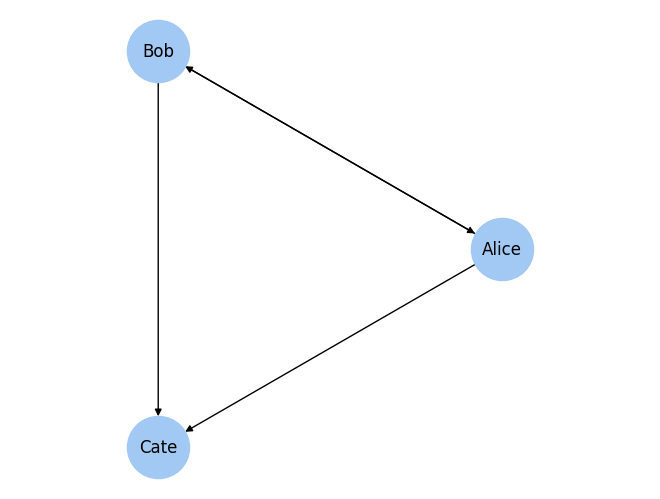

In [7]:
nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
savefig('figs/chap02-1')

**Exercise:**  Add another node and a few more edges and draw the graph again.

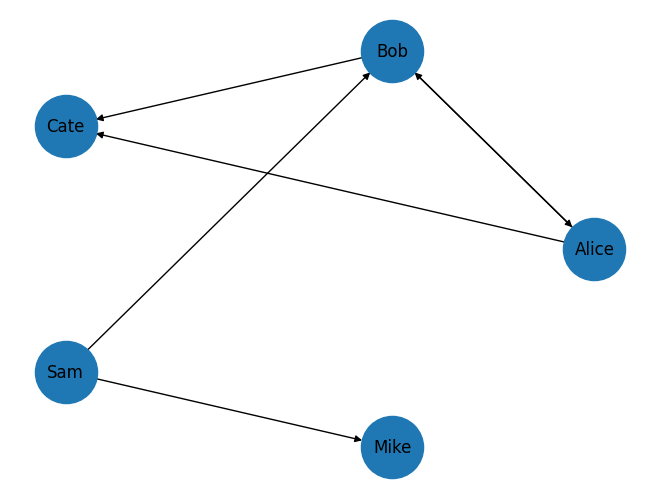

In [8]:
# Solution goes here
G.add_node('Sam')
G.add_node('Mike')
G.add_edge('Sam','Bob')
G.add_edge('Sam','Mike')
nx.draw_circular(G, node_size = 2000,with_labels=True)

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`positions` is a dictionary that maps from each city to its coordinates.

In [9]:
positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))

positions['Albany']

(-74, 43)

We can use the keys in `pos` to add nodes to the graph.

In [10]:
G = nx.Graph()
G.add_nodes_from(positions)
G.nodes()

NodeView(('Albany', 'Boston', 'NYC', 'Philly'))

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [11]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [12]:
G.add_edges_from(drive_times)
G.edges()

EdgeView([('Albany', 'Boston'), ('Albany', 'NYC'), ('Boston', 'NYC'), ('NYC', 'Philly')])

Now we can draw the graph using `positions` to indicate the positions of the nodes, and `drive_times` to label the edges.

Saving figure to file figs/chap02-2


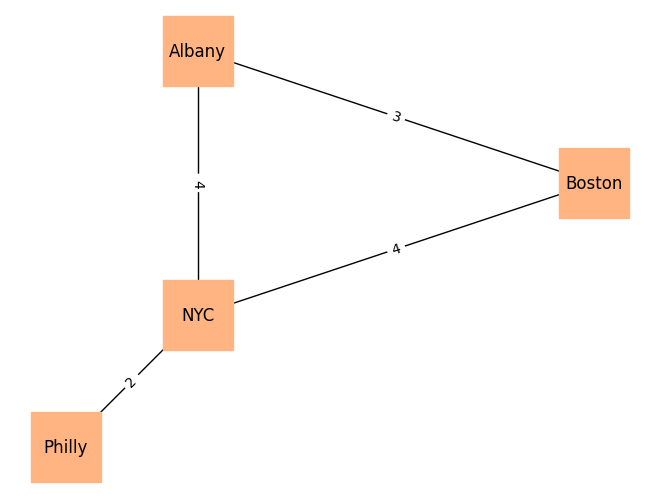

In [13]:
nx.draw(G, positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions, 
                             edge_labels=drive_times)

plt.axis('equal')
savefig('figs/chap02-2')

**Exercise:**  Add another city and at least one edge.

(-80.94500000000001,
 -70.05499999999999,
 36.370000000000005,
 43.629999999999995)

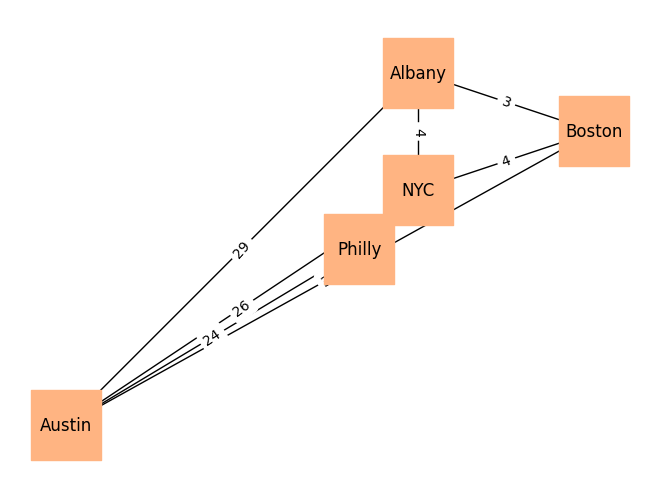

In [14]:
# Solution goes here
positions['Austin']=(-80,37)
G.add_node('Austin')

new_drives = {('Austin', 'Boston'): 30,
               ('Albany', 'Austin'):29,
               ('Austin', 'NYC'):26,
               ('Austin', 'Philly'): 24}

drive_times.update(new_drives)
G.add_edges_from(new_drives)

nx.draw(G, positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions, 
                             edge_labels=drive_times)

plt.axis('equal')

## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [15]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [16]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G


Here's a complete graph with 10 nodes:

In [17]:
complete = make_complete_graph(10)
complete.number_of_nodes()

10

And here's what it looks like.

Saving figure to file figs/chap02-3


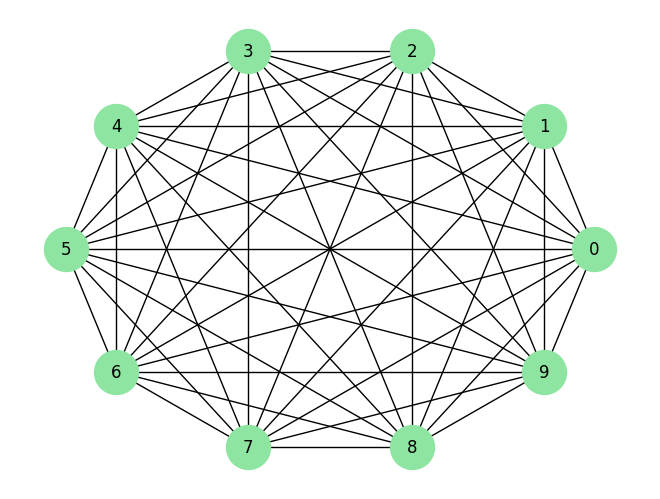

In [18]:
nx.draw_circular(complete, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)
savefig('figs/chap02-3')

The `neighbors` method the neighbors for a given node.

In [19]:
list(complete.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

Saving figure to file figs/chap02-3


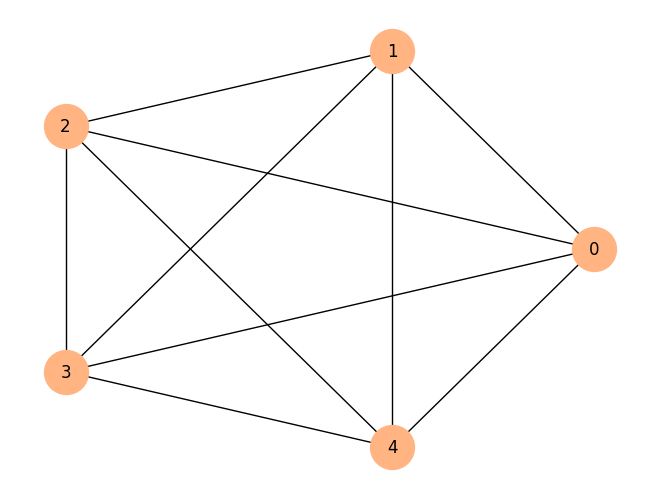

In [20]:
# Solution goes here
complete_5=make_complete_graph(5)
nx.draw_circular(complete_5, 
                 node_color='C1', 
                 node_size=1000, 
                 with_labels=True)
savefig('figs/chap02-3')

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [21]:
def flip(p):
    return np.random.random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [22]:
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [23]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [24]:
np.random.seed(10)

random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

12

And here's what it looks like:

Saving figure to file figs/chap02-4


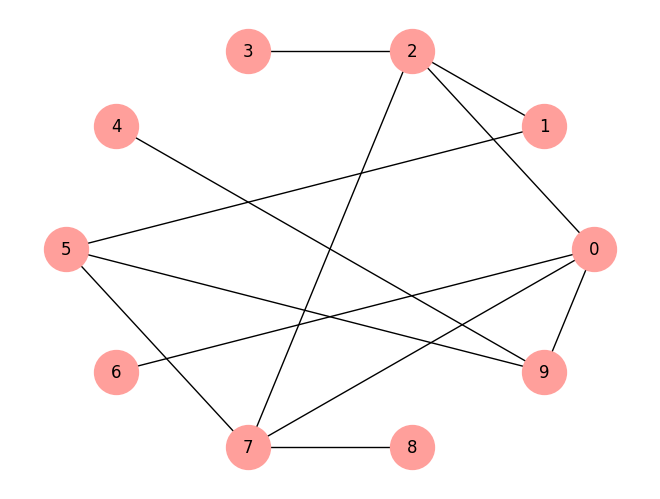

In [25]:
nx.draw_circular(random_graph, 
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)
savefig('figs/chap02-4')

## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [26]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [27]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [28]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [29]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [30]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [31]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

6

In [32]:
is_connected(random_graph)

False

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

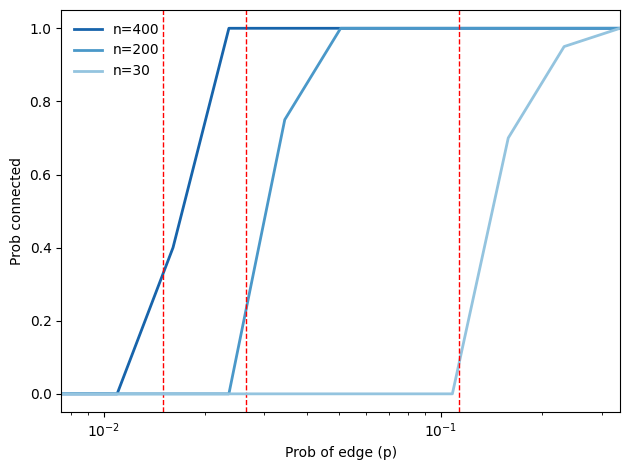

In [201]:
# Solution goes here

# makes random directed graph with edge with prob p
def random_directed_graph(n=5,p=1):
  D = nx.DiGraph()
  connections = [(i, j) for i in range(n) for j in range(n) if i!=j and np.random.random()<p]
  D.add_nodes_from(range(n))
  D.add_edges_from(connections)
  return D

#checks if the graph is connected with DFS algorithm
def directed_graph_strongly_connected(D):
  """
  Determines if a directed graph is strongly connected.

  A graph is strongly connected if there is a path between any two vertices 
  in both directions.

  Parameters:
  D (networkx.DiGraph): A directed graph.

  Returns:
  bool: True if the graph is strongly connected, False otherwise.
  """

  # DFS helper function
  def dfs(graph, start, seen):
    stack = [start]
    while stack:
      curr = stack.pop()
      if curr not in seen:
        seen.add(curr)
        stack.extend(graph.neighbors(curr))

  # checks if graph is empty
  if len(D) == 0:  return False

  # checks forward
  seen = set()
  start = next(iter(D))
  dfs(D, start,seen)

  # if not reachable by first DFS returns
  if len(seen) != len(D): return False

  # checks backward 
  transpose = D.reverse(copy=True)
  seen.clear()
  dfs(transpose, start, seen)
  
  return len(seen) == len(D)


# builds i random directed graphs, checks if they are connected, and prints percentage of connected
def probability_of_connection(n,prob,iterations=100):
  return np.mean([directed_graph_strongly_connected(random_directed_graph(n=n,p=prob)) for i in range(iterations)])


#plotting
ns = [400, 200, 30]
iterations = 20
#get the probability of connection for range of probabilities
rng =np.logspace(math.log10(.5*math.log(ns[0])/ns[0]), math.log10(3*math.log(ns[-1])/ns[-1]), 11) 
for n in ns:
  data = [(prob,probability_of_connection(n,prob,iterations)) for prob in rng]   

  #extracting (x,y) from data
  x_values, y_values = zip(*data)
  v_line = math.log(n)/n  #seems to be very similar to the undirected version

  plt.plot(x_values, y_values, label='n=' + str(n))
  plt.axvline(x=v_line, color='red', linestyle='--', linewidth = 1)

decorate(xlabel='Prob of edge (p)',
         ylabel='Prob connected',
         xscale='log', 
         xlim=[x_values[0], x_values[-1]],
         loc='upper left')

plt.show()

Function works: True
False
0.13


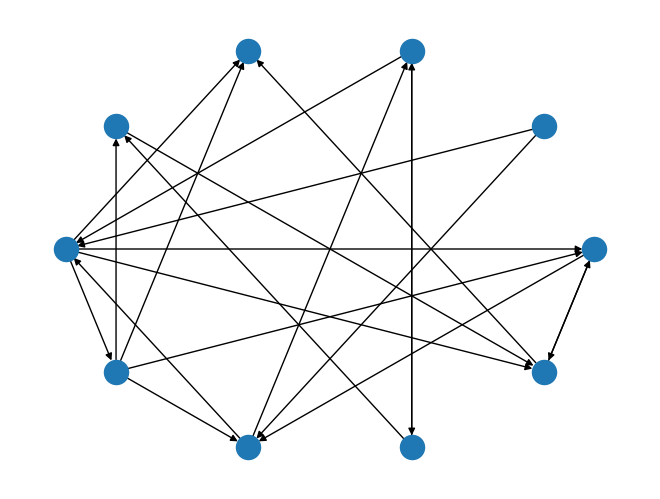

In [246]:
# example
n=10
p=math.log(n)/n
D = random_directed_graph(n,p)

# checks if function for strongly connected works
print(f'Function works: {all([nx.is_strongly_connected(D) == directed_graph_strongly_connected(D) for _ in range(1000)])}')

# example 
print(directed_graph_strongly_connected(D))
print(probability_of_connection(n,p,100))
nx.draw_circular(D)
plt.show()

## Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [34]:
# version with a for loop
def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

In [35]:
# version with a list comprehension
def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p))
          for i in range(iters)]
    return np.mean(tf)

With `n=10` and `p=0.23`, the probability of being connected is about 33%.

In [36]:
np.random.seed(17)

n = 10
prob_connected(n, 0.23, iters=10000)

0.3393

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [37]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [38]:
ps = np.logspace(-1.3, 0, 11)
ps

array([0.05011872, 0.0676083 , 0.09120108, 0.12302688, 0.16595869,
       0.22387211, 0.30199517, 0.40738028, 0.54954087, 0.74131024,
       1.        ])

I'll estimate the probabilities with `iters=1000`

In [39]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.05011872336272722 0.0
0.06760829753919818 0.0
0.09120108393559097 0.004
0.12302687708123815 0.016
0.16595869074375605 0.109
0.22387211385683395 0.346
0.3019951720402016 0.664
0.40738027780411273 0.899
0.5495408738576245 0.989
0.7413102413009173 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

Saving figure to file figs/chap02-5


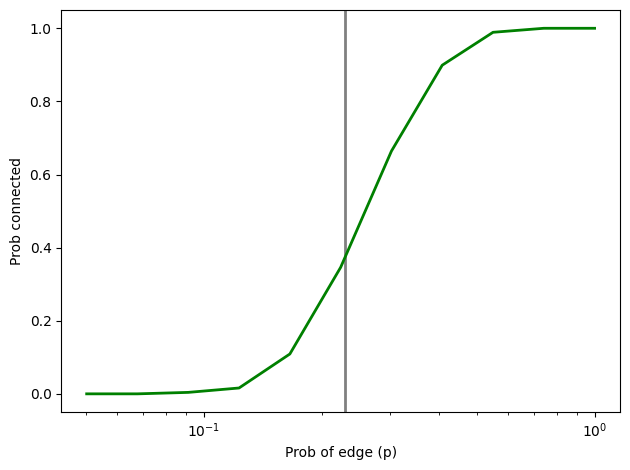

In [40]:
plt.axvline(pstar, color='gray')
plt.plot(ps, ys, color='green')
decorate(xlabel='Prob of edge (p)',
                 ylabel='Prob connected',
                 xscale='log')

savefig('figs/chap02-5')

We can run the same analysis for a few more values of `n`.

300
100
30
Saving figure to file figs/chap02-6


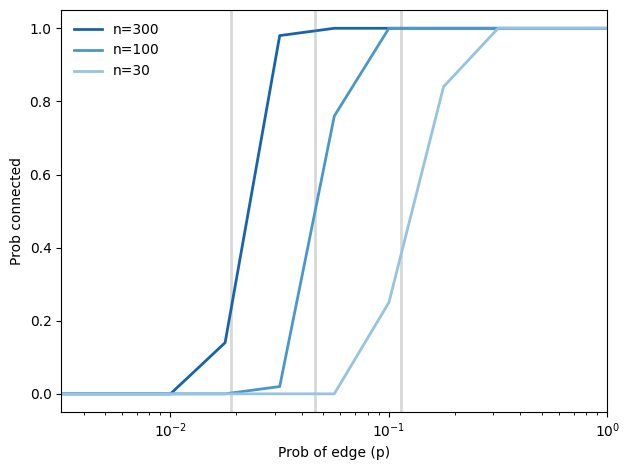

In [41]:
ns = [300, 100, 30]
ps = np.logspace(-2.5, 0, 11)

sns.set_palette('Blues_r', 4)
for n in ns:
    print(n)
    pstar = np.log(n) / n
    plt.axvline(pstar, color='gray', alpha=0.3)

    ys = [prob_connected(n, p) for p in ps]
    plt.plot(ps, ys, label='n=%d' % n)

decorate(xlabel='Prob of edge (p)',
         ylabel='Prob connected',
         xscale='log', 
         xlim=[ps[0], ps[-1]],
         loc='upper left')

savefig('figs/chap02-6')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = list(G)[0]
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

In [42]:
# Solution goes here

'''O(n+m) since reachable has a run time of O(n+m) and the first and third line are linear.'''


'O(n+m) since reachable has a run time of O(n+m) and the first and third line are linear.'

**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [43]:
def reachable_nodes_precheck(G, start):
    # FILL THIS IN
    return []

In [44]:
# Solution goes here
def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
      node = stack.pop()
      if node not in seen:
        seen.add(node)
        stack.extend(set(G[node]) - seen)

    return seen

complete = make_complete_graph(2000)


In [45]:
%timeit len(reachable_nodes(complete, 0))

184 ms ± 5.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%timeit len(reachable_nodes_precheck(complete, 0))

176 ms ± 3.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [47]:
# Solution goes here
def m_pairs(n, m):
  return rand.sample( [(u, v) for i,u in enumerate(n) 
                       for j,v in enumerate(n) if i<j],m)

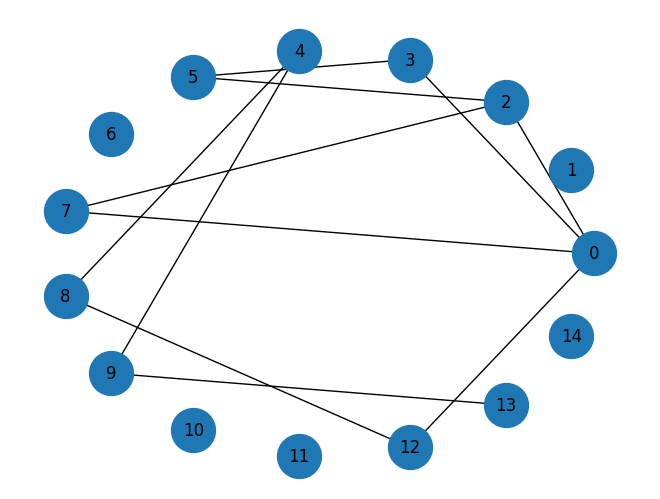

In [48]:
def make_m_graph(n,m):
  G = nx.Graph()
  G.add_nodes_from(range(n))
  G.add_edges_from(m_pairs(range(n),m))
  return G

mstar = int(np.log(n)/n*math.comb(15,2))

nx.draw_circular(make_m_graph(15,mstar), 
                 node_size=1000, 
                 with_labels=True)

In [49]:
def prob_m_connected(n,m,iters=2000):
  return np.mean([is_connected(make_m_graph(n,m)) for i in range(iters)])

n = 15
ms,ys = zip(*[(m,prob_m_connected(n,m)) for m in range(math.comb(n, 2))])
ps = list(map(lambda m: m/ms[-1],ms))

for mp in zip(ms,ps,ys):
   if 0 < mp[2] < 1:
     print(mp[0], round(mp[1],2),mp[2])

14 0.13 0.0235
15 0.14 0.0605
16 0.15 0.1365
17 0.16 0.211
18 0.17 0.3
19 0.18 0.3865
20 0.19 0.4625
21 0.2 0.5375
22 0.21 0.604
23 0.22 0.6375
24 0.23 0.7145
25 0.24 0.76
26 0.25 0.8045
27 0.26 0.853
28 0.27 0.8685
29 0.28 0.893
30 0.29 0.907
31 0.3 0.934
32 0.31 0.93
33 0.32 0.944
34 0.33 0.954
35 0.34 0.971
36 0.35 0.9735
37 0.36 0.982
38 0.37 0.981
39 0.38 0.987
40 0.38 0.9915
41 0.39 0.993
42 0.4 0.994
43 0.41 0.994
44 0.42 0.994
45 0.43 0.997
46 0.44 0.9965
47 0.45 0.997
48 0.46 0.998
49 0.47 0.9995
50 0.48 0.9995
51 0.49 0.9985
53 0.51 0.999


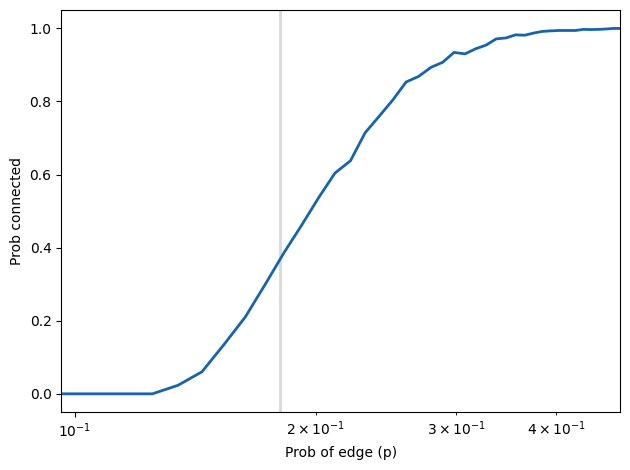

In [50]:
plt.axvline(np.log(n) / n, color='gray', alpha=0.3)

plt.plot(ps,ys)

decorate(xlabel='Prob of edge (p)',
         ylabel='Prob connected',
         xscale='log', 
         xlim=[ps[10], ps[50]],
         loc='upper left')


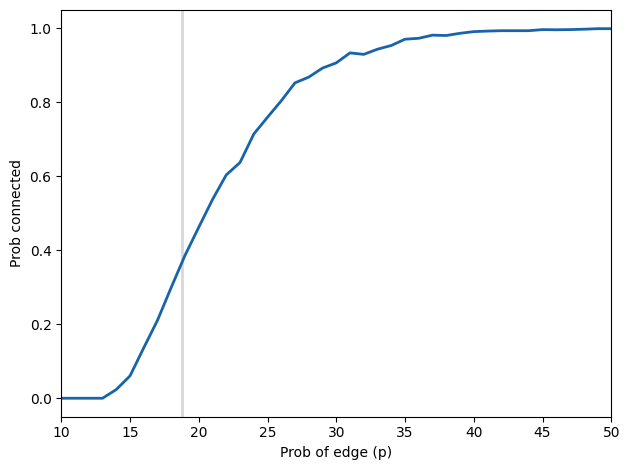

In [51]:
plt.axvline(np.log(n) / n*ms[-1], color='gray', alpha=0.3)

plt.plot(ms,ys)

decorate(xlabel='Prob of edge (p)',
         ylabel='Prob connected', 
         xlim=[ms[10], ms[50]],
         loc='upper left')